In [1]:
import pandas as pd
import numpy as np

In [2]:
auto_prices = pd.read_csv('Automobile price data _Raw_.csv')

The first step is to replace '-' with '_' for our libiaries to work well

In [3]:
auto_prices.columns = [str.replace('-','_') for str in auto_prices.columns]
print(auto_prices.columns)

Index(['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration',
       'num_of_doors', 'body_style', 'drive_wheels', 'engine_location',
       'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type',
       'num_of_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke',
       'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg',
       'highway_mpg', 'price'],
      dtype='object')


The next step is to look which column has missing value. Run the below code and explore.

In [4]:
((auto_prices.astype(dtype = object) == '?').any())

symboling            False
normalized_losses     True
make                 False
fuel_type            False
aspiration           False
num_of_doors          True
body_style           False
drive_wheels         False
engine_location      False
wheel_base           False
length               False
width                False
height               False
curb_weight          False
engine_type          False
num_of_cylinders     False
engine_size          False
fuel_system          False
bore                  True
stroke                True
compression_ratio    False
horsepower            True
peak_rpm              True
city_mpg             False
highway_mpg          False
price                 True
dtype: bool

#The next step is counting how many missing values are in the column.

In [5]:
for col in auto_prices.columns:
    if auto_prices[col].dtype == object:
        count = 0
        count = [count + 1 for x in auto_prices[col] if x == '?']
        print(col + ' ' + str(sum(count)))


normalized_losses 41
make 0
fuel_type 0
aspiration 0
num_of_doors 2
body_style 0
drive_wheels 0
engine_location 0
engine_type 0
num_of_cylinders 0
fuel_system 0
bore 4
stroke 4
horsepower 2
peak_rpm 2
price 4


In [6]:
auto_prices.columns[auto_prices.drop('normalized_losses',axis = 1, inplace = True)]

array([['symboling', 'normalized_losses', 'make', 'fuel_type',
        'aspiration', 'num_of_doors', 'body_style', 'drive_wheels',
        'engine_location', 'wheel_base', 'length', 'width', 'height',
        'curb_weight', 'engine_type', 'num_of_cylinders', 'engine_size',
        'fuel_system', 'bore', 'stroke', 'compression_ratio',
        'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price']],
      dtype=object)

In [7]:
cols = ['price', 'bore', 'stroke',
          'horsepower', 'peak_rpm']

print(cols)

['price', 'bore', 'stroke', 'horsepower', 'peak_rpm']


In [8]:
cols = ['price', 'bore', 'stroke',
          'horsepower', 'peak_rpm']
for column in cols:
    auto_prices.loc[auto_prices[column]=='?',column ] = np.nan
    
auto_prices.dropna(axis = 0, inplace = True)
print (auto_prices.head())

   symboling         make fuel_type aspiration num_of_doors   body_style  \
0          3  alfa-romero       gas        std          two  convertible   
1          3  alfa-romero       gas        std          two  convertible   
2          1  alfa-romero       gas        std          two    hatchback   
3          2         audi       gas        std         four        sedan   
4          2         audi       gas        std         four        sedan   

  drive_wheels engine_location  wheel_base  length  ...    engine_size  \
0          rwd           front        88.6   168.8  ...            130   
1          rwd           front        88.6   168.8  ...            130   
2          rwd           front        94.5   171.2  ...            152   
3          fwd           front        99.8   176.6  ...            109   
4          4wd           front        99.4   176.6  ...            136   

   fuel_system  bore stroke compression_ratio  horsepower peak_rpm city_mpg  \
0         mpfi  3.4

In [10]:
# Transform column datatypes
for column in cols:
    auto_prices[column] = pd.to_numeric(auto_prices[column])

# Feature Engineering


In [11]:
auto_prices['num_of_cylinders'].value_counts()

four      155
six        24
five       10
eight       4
twelve      1
three       1
Name: num_of_cylinders, dtype: int64

In [12]:
cylinder_categories = {'three':'three_four', 'four':'three_four', 
                    'five':'five_six', 'six':'five_six',
                    'eight':'eight_twelve', 'twelve':'eight_twelve'}
auto_prices['num_of_cylinders'] = [cylinder_categories[x] for x in auto_prices['num_of_cylinders']]
auto_prices['num_of_cylinders'].value_counts()

three_four      156
five_six         34
eight_twelve      5
Name: num_of_cylinders, dtype: int64

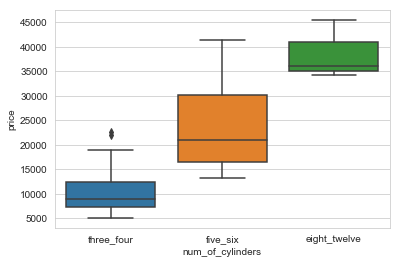

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot(auto_prices,col):
    sns.set_style("whitegrid")
    sns.boxplot(col,'price',data=auto_prices)
    plt.xlabel(col)
    plt.ylabel('price')
        
plot(auto_prices, 'num_of_cylinders')    
    

In [18]:
auto_prices['body_style'].value_counts()

sedan          94
hatchback      63
wagon          24
hardtop         8
convertible     6
Name: body_style, dtype: int64

In [27]:
cols = {'sedan':'sedan', 'hatchback':'hatchback', 'wagon':'wagon', 
             'hardtop':'hardtop_convert', 'convertible':'hardtop_convert'}

In [28]:
auto_prices['body_style'] = [cols[x] for x in auto_prices['body_style']]
print(auto_prices['body_style'].value_counts())

sedan              94
hatchback          63
wagon              24
hardtop_convert    14
Name: body_style, dtype: int64


In [32]:
def plot (col):
    sns.set_style('whitegrid')
    sns.boxplot(col,'price',data= auto_prices)
    plt.xlabel(col)

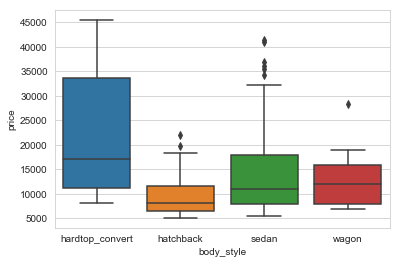

In [33]:
plot('body_style')

# Transformation Numeric variables


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


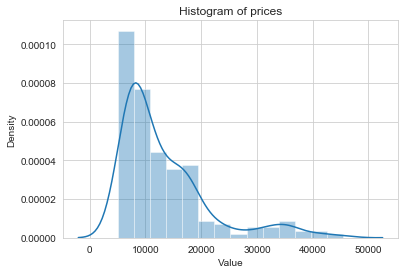

In [35]:


def hist_plot(vals, lab):
    #Distribution Plot
    sns.distplot(vals)
    plt.title('Histogram of '+lab)
    plt.xlabel('Value')
    plt.ylabel('Density')

hist_plot(auto_prices['price'], 'prices')

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


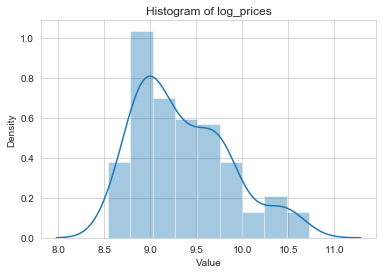

In [36]:
auto_prices['log_price'] = np.log(auto_prices['price'])
hist_plot (auto_prices['log_price'], 'log_prices')